## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

# Trying some various ML models

In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))

    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=True)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=True)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model


/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
def gen_data(mean = 0, var = 1, SIZE = 10000):
    a = np.random.normal(mean, var, SIZE)
    b = np.random.normal(mean, var, SIZE)
    c = np.random.normal(mean, var, SIZE)
    d = np.random.normal(mean, var, SIZE)
    e = np.random.normal(mean, var, SIZE)
    f= a + b + c + d + e + np.random.normal(mean, var, SIZE)
    g = f + np.random.normal(mean,var, SIZE)
    #g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

from pycausal import prior as p
prior = p.knowledge(requiredirect =  [['a', 'f'], 
                                      ['b', 'f'], 
                                      ['c', 'f'],
                                      ['d', 'f'], 
                                      ['e', 'f'], 
                                      ['f', 'g']
                                     ]
                   
                   )
df = gen_data()
get_CG(df, tetrad)

Instance of edu.cmu.tetrad.graph.EdgeListGraphSingleConnections: Graph Nodes:
a;b;c;d;e;f;g

Graph Edges:
1. f --> g dd nl
2. a o-> f
3. b o-> f
4. c o-> f
5. d o-> f
6. e o-> f

Graph Attributes:
BIC: -666.348496


In [71]:
samples = 10000
def gen_data(mean = 0, var = 1, SIZE = samples):
    a = np.random.normal(mean, var, SIZE)
    b = np.random.normal(mean, var, SIZE)
    c = np.random.normal(mean, var, SIZE)
    d = np.random.normal(mean, var, SIZE)
    e = np.random.normal(mean, var, SIZE)
    f= a + b + c + d + e + np.random.normal(mean, var, SIZE)
    g = f + np.random.normal(mean,var, SIZE) + np.random.normal(0, 3, SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
tot = []
for i in range(10):
    df = gen_data()
    ret = tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    print(BIC)
    tot.append(BIC)
np.mean(tot)/samples

-45372.050849878346
-44821.83205899893
-44571.67693793885
-45242.79649461911
-44515.34939725454
-44850.50239365747
-44707.5184859108
-44574.51730047355
-45520.83731097974
-45626.60801568127


-4.498036892453926

In [53]:
t = tetrad.getTetradGraph()
h = t.getAllAttributes()
h.toString()

BIC = tetrad.getTetradGraph().getAllAttributes().toString()
BIC = float(BIC.split('=')[-1].split('}')[0])
BIC 

-36042.168111140796

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s




def discrete_gauss(low, high, samples, std = 20):
    x = np.arange(low, high)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = std) - ss.norm.cdf(xL, scale = std)
    prob = prob / prob.sum() #normalize the probabilities so their sum is 1
    nums = np.random.choice(x, size = samples, p = prob)
    return nums



def bar_plot(x_ax, val1, val1std, val2, val2std):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = len(x_ax)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    fig.set_size_inches(18.5, 10.5)
    ## the bars
    rects1 = ax.bar(ind, val1, width,
                    color='gray',
                    yerr=val1std,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

    rects2 = ax.bar(ind+width, val2, width,
                        color='blue',
                        #yerr=val2std,
                        error_kw=dict(elinewidth=2,ecolor='gray'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    #ax.set_ylim(0,45)
    ax.set_ylabel('Percentage')
    ax.set_title('')
    plt.xticks(ind + width / 2, x_ax, rotation=75, size = 14)
    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Accuracy', '% Violations') )
    fig.savefig("violations.pdf", bbox_inches='tight')
    plt.show()





def gen_data(mean = 0, var = 1, SIZE = 5000):
    a = np.random.gumbel(mean, var, SIZE)
    b = np.random.gumbel(mean, var, SIZE)
    c = np.random.gumbel(mean, var, SIZE)
    d = np.random.gumbel(mean, var, SIZE)
    e = np.random.gumbel(mean, var, SIZE)
    f= a + b + c + d + e + np.random.gumbel(mean, var, SIZE)
    g = f + np.random.gumbel(mean,var, SIZE)
    g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data(mean = 0, var = 1, SIZE = 5000):
    a = np.random.gumbel(mean, var, SIZE)
    b = np.random.gumbel(mean, var, SIZE)
    c = np.random.gumbel(mean, var, SIZE)
    d = np.random.gumbel(mean, var, SIZE)

    f= a + b + c + d + np.random.gumbel(mean, var, SIZE)
    g = f + np.random.gumbel(mean,var, SIZE)
    
    
    g = np.rint(g)
    e = g + np.random.gumbel(mean,var,SIZE)
    
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})


def gen_data(mean = 0, var = 1, SIZE = 400000):
    f = np.random.normal(mean, var, SIZE)
    a = f + np.random.normal(mean, var, SIZE)
    b = f + np.random.normal(mean, var, SIZE)
    c = f + np.random.normal(mean, var, SIZE)
    d = f + np.random.normal(mean, var, SIZE)
    e = f + np.random.normal(mean, var, SIZE)
    g = a + b + c + d  + e + np.random.normal(mean, var, SIZE)

    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data(mean = 0, var = 1, SIZE = 100000):
    a = np.random.normal(mean, var, SIZE)
    b = np.random.normal(mean, var, SIZE)
    c = np.random.normal(mean, var, SIZE)
    d = np.random.normal(mean, var, SIZE)
    e = np.random.normal(mean, var, SIZE)
    f= a + b + c + d + e + np.random.normal(mean, var, SIZE)
    g = f + np.random.normal(mean,var, SIZE)
    #g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})



def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'fges-mb', targetName = 'g', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
    #       completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    children = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            children.add(i[-1])
    return parents, children

from pycausal.pycausal import pycausal as pc
from collections import defaultdict
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()






verbosity = 0

'''
models = [#[8,8,4],
          #[16,16,8],
          #LogisticRegression(), 
          #Perceptron(),  
          #DecisionTreeClassifier(),
          #LinearSVC(),
          #GaussianNB(),
          #[32,32,16],
          #[64,64,32],
          #[128, 128, 64],
          #[256, 256, 128],
          #[512, 512, 256],
          #[1024, 1024, 512],
          [2048, 2048, 2048, 1024],[2048, 2048, 2048, 1024],[2048, 2048, 2048, 1024], 
            [2048, 2048, 2048, 1024],[2048, 2048, 2048, 1024],[2048, 2048, 2048, 1024],
            [2048, 2048, 2048, 1024],[2048, 2048, 2048, 1024],[2048, 2048, 2048, 1024],
          #[2048, 2048, 1024],
         ]
model_names = ['n1', 
               'n2',
               'n3',
                'n4', 
               'n5',
               'n6',
                'n7', 
               'n8',
               'n9',

               #'m7', 
               #'m8',
               #'m9',
               #'m10', 
               #'m11a',
               #'m11b',
               #'m11c',
              ]
'''


models = []
model_names = []

num_models = 100
model_layers = [1024,512]
for i in range(num_models):
    models.append(model_layers)
    model_names.append('temp/c' + str(i))

print(models, model_names)


df = gen_data()
X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

val_df = gen_data(SIZE = 10000)
x_val = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y_val = df['g'].values




/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512], [1024, 512]

In [11]:
## the size of the test set
nb_test = 2000


metrics_dicts = []
for m in models:
    metrics_dicts.append(defaultdict(list))


#means = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#variances = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
means = [0,1,2, 3 ,4]
variances = [1, 2, 3, 4]


# ok at this point we need to check the model on various variances and means
for m in means:
    for v in variances:
        print(m,v)
        #t0 = time.time()
        perturbed_df = gen_data(mean =m, var = v, SIZE = nb_test)
        y_test2 = perturbed_df['g']
        x_test2 = perturbed_df[['a', 'b', 'c', 'd', 'e', 'f']]
        #t1 = time.time()
        #print("Time for gen_data = ", t1 - t0)
        for idx, model_name in enumerate(model_names):
            #t0 = time.time()
            if type(models[idx]) is list:
                keras.backend.clear_session()
                model = load_model(model_name)
            else:
                model = models[idx]
            #t1 = time.time()
            #print("Time to load model = ", t1 - t0)
            
            y_pred2 = model.predict(x_test2)
            metrics_dicts[idx][str(m) + '_' + str(v)].append(mean_squared_error(y_test2, y_pred2))

            test_df2 = pd.DataFrame(x_test2, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets2 = pd.DataFrame(model.predict(x_test2), columns = ['g'])
            test_df2 = test_df2.join(test_targets2)




0 1
0 2
0 3
0 4
1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4


In [4]:
#the number of times to sample 
times = 10


violations = np.zeros(len(models))
violation_mean = np.zeros((len(models), times))
violation_mean2 = np.zeros((len(models), times))
mean = np.zeros((len(models), times))

fold = 0

#metrics_dicts = []
causal_dicts = []
for m in models:
#    metrics_dicts.append(defaultdict(list))
    causal_dicts.append(defaultdict(list))



for t in range(times):
    print("Times = ", t)
    df_test = gen_data(SIZE = nb_test)
    x_test = df_test[['a', 'b', 'c', 'd', 'e', 'f']].values
    y_test = df_test['g'].values
    setAp, setAc = get_MB(get_CG(df_test, tetrad), 'g', pc)
    setA = set(tetrad.getEdges())
    #print("BIC1 = ", tetrad.getTetradGraph().toString().split('BIC')[-1])

    for idx, model_name in enumerate(model_names):
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]
        test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
        test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
        test_df = test_df.join(test_targets)
        mean[idx][t] = mean_squared_error(y_test, model.predict(x_test))  
        #print(mean_squared_error(y_test, model.predict(x_test)))


        setBp, setBc = get_MB(get_CG(test_df, tetrad), 'g', pc)
        setB = set(tetrad.getEdges())
        #print("BIC2 = ", tetrad.getTetradGraph().toString().split('BIC')[-1])
        print(setAp, setAc, setBp, setBc)
        if setAp != {'f'}:
            print("Error in SETAp markov blanket")
            #setA = {'f'}
        print(setAp, setAc, setBp, setBc)
        
        #print("Set violations = ", len(setA.difference(setB)) + len(setB.difference(setA)))
        #print("Violations = ",len(setAp.difference(setBp)) + len(setBp.difference(setAp)) + len(setAc.difference(setBc)) + len(setBc.difference(setAc)))
        violation_mean[idx][t] = len(setAp.difference(setBp)) + len(setBp.difference(setAp)) + len(setAc.difference(setBc)) + len(setBc.difference(setAc))
        violation_mean2[idx][t] = len(setA.difference(setB)) + len(setB.difference(setA))
        if setAp != setBp or setAc != setBc:
            #print("Violation:", model_names[idx], setA , setB)
            violations[idx] += 1


Times =  0
{'f'} set() {'d', 'b', 'e'} {'f'}
{'f'} set() {'d', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'e'} {'f'}
{'f'} set() {'a', 'd', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'e'} {'f'}
{'f'} set() {'c', 'e'} {'f'}
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'c', 'e'} {'f'}
{'f'} set() {'a', 'c', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd'

{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'d', 'b', 'e'} {'f'}
{'f'} set() {'d', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd

{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'e', 'f'} set()
{'f'} set() {'e', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', '

{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'a', 'e'} {'f'}
{'f'} set() {'a', 'e'} {'f'}
{'f'} set() {'e', 'f'} set()
{'f'} set() {'e', 'f'} set()
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'e', 'f'} set()
{'f'} set() {'e', 'f'} set()
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'f'} se

{'f'} set() {'a', 'f'} set()
{'f'} set() {'a', 'f'} set()
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'a', 'c', 'b'} {'f'}
{'f'} set() {'a', 'c', 'b'} {'f'}
{'f'} set() {'c', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'a', 'c', 'e'} {'f'}
{'f'} set() {'a', 'c', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b'} {'f'}
{'f'} set() {'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'a', 'b', 'e'} {'f'}
{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}

{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'a', 'd', 'e'} {'f'}
{'f'} set() {'a', 'd', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'b'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd',

{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'c', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e'} {'f'}
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'f'} set()
{'f'} set() {'a', 'f'} set()
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'd'} {'f'}
{'f'} set() {'a', 'd'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'a', 'c', 'd', 'b'} {'f'}
{'f'} set

{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'b', 'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'b', 'f'} set()
{'f'} set() {'c', 'b', 'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'a', 'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'c', 'b', 'e', 'd', 'a'} {'f'}
{'f'} set() {'e', 'f'} set()
{'f'} set() {'e', 'f'

{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'a', 'c', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'd', 'e'} {'f'}
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'c', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd'} {'f'}
{'f'} set() {'c', 'd'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'e', 'f'} set()
{'f'} set() {'e', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'d', 'f'} set()
{'f'} set() {'a', 'd', 'f'} set()
{'f'} set() {'a', 'd', 'f'} set()
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'c', 'd', 'b', 'e'} {'f'}
{'f'} set() {'f'} set()
{'f'} set() {'f'} set()
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'a', 'd', 'b', 'e'} {'f'}
{'f'} set() {'d', 'f'} set()
{

Model_name =  temp/c0 Violations =  10.0
Average_violations =  4.5 1.8027756377319946
MSE =  1.0724182283852546 0.02721096800412864
Model_name =  temp/c1 Violations =  4.0
Average_violations =  2.1 3.014962686336267
MSE =  1.0886043202924514 0.027507805060368044
Model_name =  temp/c2 Violations =  10.0
Average_violations =  5.0 2.0
MSE =  1.1040402331235644 0.03297153310998834
Model_name =  temp/c3 Violations =  7.0
Average_violations =  4.1 3.176476034853718
MSE =  1.1072733063157638 0.028440322754913403
Model_name =  temp/c4 Violations =  10.0
Average_violations =  4.7 1.2688577540449522
MSE =  1.1212855929559815 0.029109508548728704
Model_name =  temp/c5 Violations =  10.0
Average_violations =  4.2 1.6
MSE =  1.0711196556462328 0.02510139245046889
Model_name =  temp/c6 Violations =  10.0
Average_violations =  3.5 2.5
MSE =  1.082838384545231 0.02545862609077144
Model_name =  temp/c7 Violations =  10.0
Average_violations =  4.5 2.29128784747792
MSE =  1.1047237545100934 0.02285720089

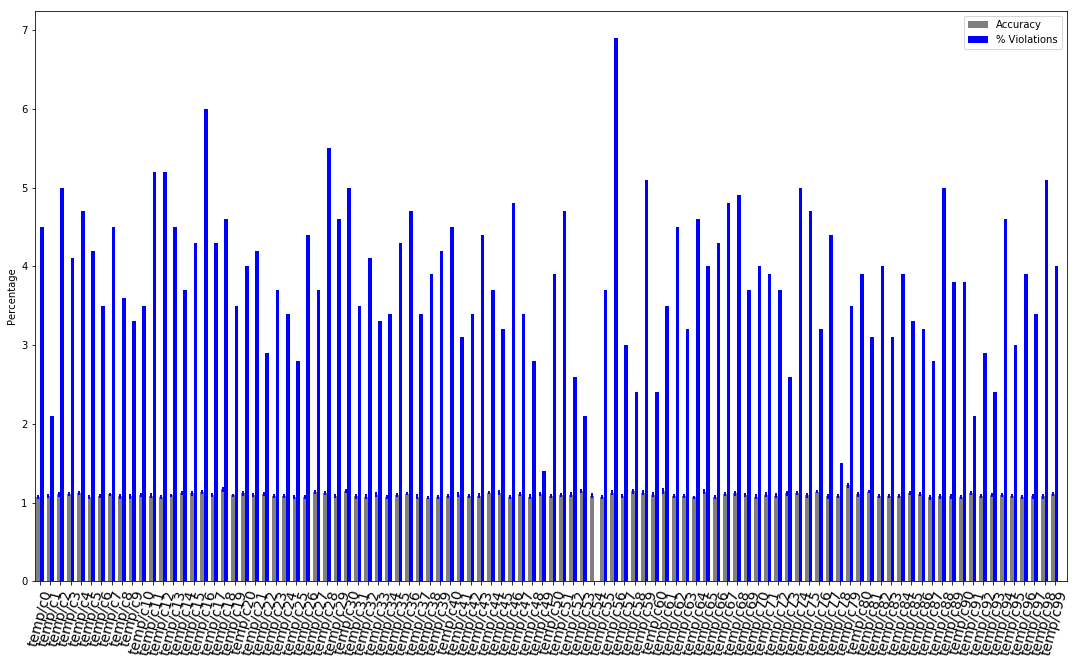

temp/c0
Area under surface (rectangular approx) =  294.32346006790624
Violations =  10.0
Average_violations =  4.5
MSE =  1.0724182283852546


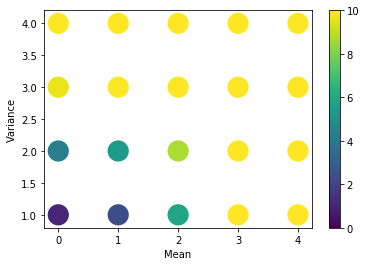

temp/c1
Area under surface (rectangular approx) =  441.3668594633924
Violations =  4.0
Average_violations =  2.1
MSE =  1.0886043202924514


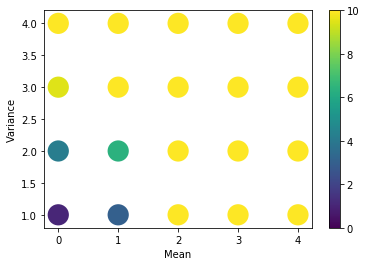

temp/c2
Area under surface (rectangular approx) =  300.4329327498491
Violations =  10.0
Average_violations =  5.0
MSE =  1.1040402331235644


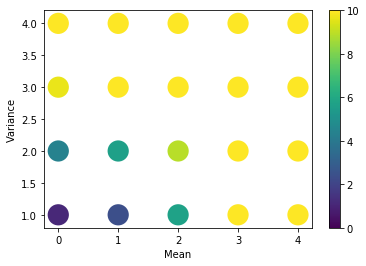

temp/c3
Area under surface (rectangular approx) =  478.58635787831906
Violations =  7.0
Average_violations =  4.1
MSE =  1.1072733063157638


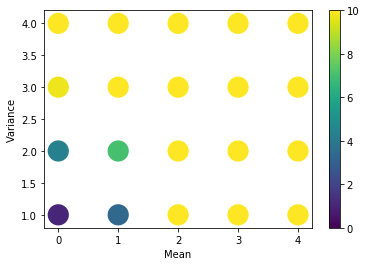

temp/c4
Area under surface (rectangular approx) =  265.9744765396699
Violations =  10.0
Average_violations =  4.7
MSE =  1.1212855929559815


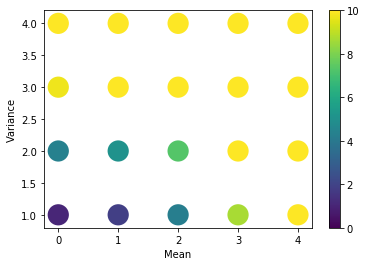

temp/c5
Area under surface (rectangular approx) =  238.8898554764572
Violations =  10.0
Average_violations =  4.2
MSE =  1.0711196556462328


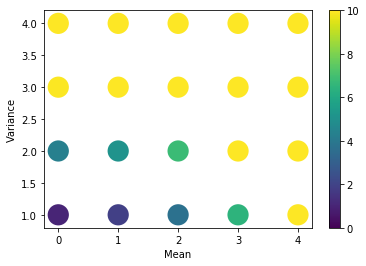

temp/c6
Area under surface (rectangular approx) =  281.0145482343556
Violations =  10.0
Average_violations =  3.5
MSE =  1.082838384545231


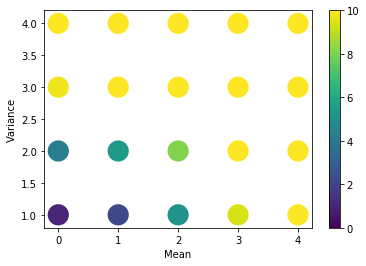

temp/c7
Area under surface (rectangular approx) =  270.0755114056636
Violations =  10.0
Average_violations =  4.5
MSE =  1.1047237545100934


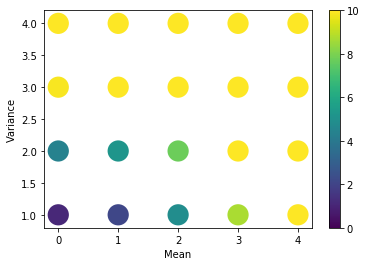

temp/c8
Area under surface (rectangular approx) =  287.62068800589014
Violations =  10.0
Average_violations =  3.6
MSE =  1.0831643261836896


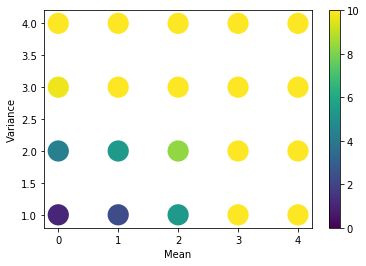

temp/c9
Area under surface (rectangular approx) =  334.07152201024155
Violations =  10.0
Average_violations =  3.3
MSE =  1.078795952783413


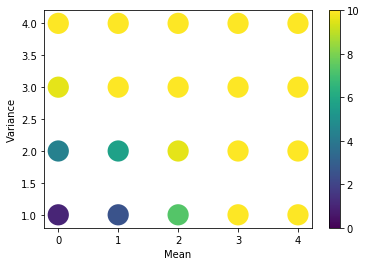

temp/c10
Area under surface (rectangular approx) =  219.25834699208744
Violations =  5.0
Average_violations =  3.5
MSE =  1.094747508390405


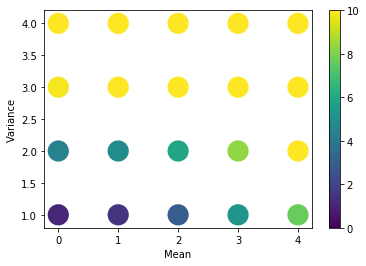

temp/c11
Area under surface (rectangular approx) =  383.1909656542135
Violations =  10.0
Average_violations =  5.2
MSE =  1.0882114782848977


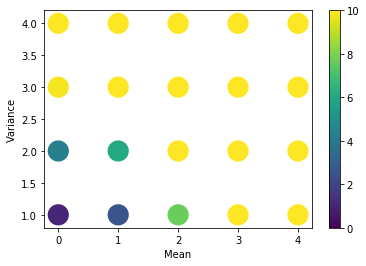

temp/c12
Area under surface (rectangular approx) =  259.45487467173785
Violations =  10.0
Average_violations =  5.2
MSE =  1.0706477500828984


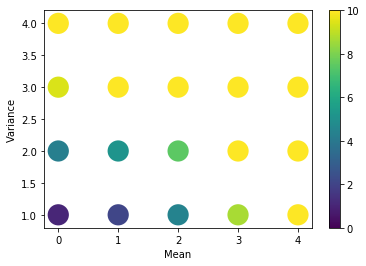

temp/c13
Area under surface (rectangular approx) =  300.01113095334006
Violations =  7.0
Average_violations =  4.5
MSE =  1.0914564532828839


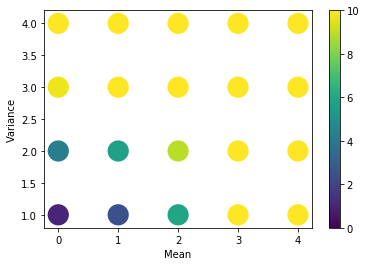

temp/c14
Area under surface (rectangular approx) =  241.7631788666652
Violations =  10.0
Average_violations =  3.7
MSE =  1.1203983553850627


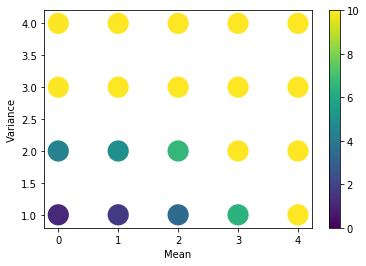

temp/c15
Area under surface (rectangular approx) =  702.9163420356829
Violations =  9.0
Average_violations =  4.3
MSE =  1.1170642010454155


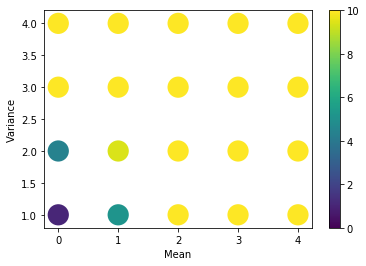

temp/c16
Area under surface (rectangular approx) =  270.2888514486308
Violations =  10.0
Average_violations =  6.0
MSE =  1.1381232734482905


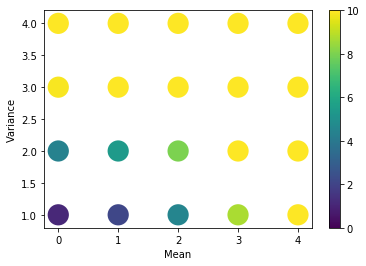

temp/c17
Area under surface (rectangular approx) =  407.64888999257187
Violations =  10.0
Average_violations =  4.3
MSE =  1.092745651046553


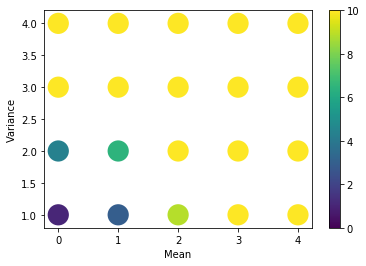

temp/c18
Area under surface (rectangular approx) =  255.1924940561545
Violations =  10.0
Average_violations =  4.6
MSE =  1.1711845069349964


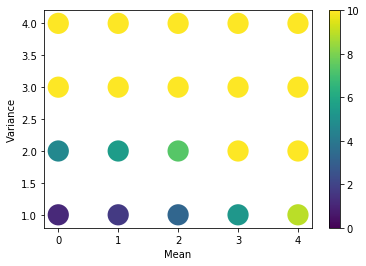

temp/c19
Area under surface (rectangular approx) =  285.0902460988036
Violations =  10.0
Average_violations =  3.5
MSE =  1.0946113577088643


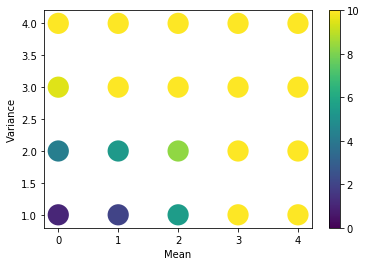

temp/c20
Area under surface (rectangular approx) =  222.11927645494157
Violations =  10.0
Average_violations =  4.0
MSE =  1.1200092769885024


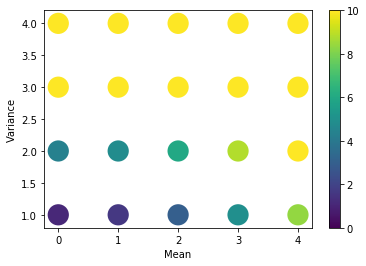

temp/c21
Area under surface (rectangular approx) =  358.9821533686227
Violations =  8.0
Average_violations =  4.2
MSE =  1.0963021392659726


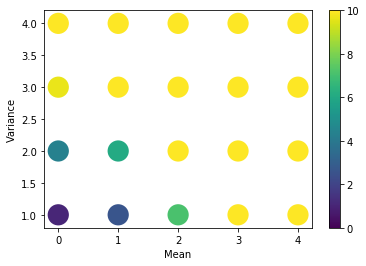

temp/c22
Area under surface (rectangular approx) =  435.4126207873508
Violations =  9.0
Average_violations =  2.9
MSE =  1.1123927520952217


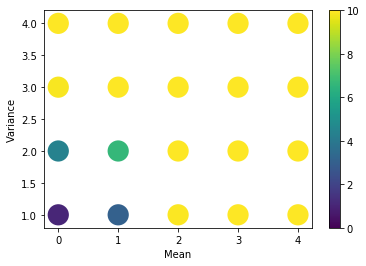

temp/c23
Area under surface (rectangular approx) =  330.9517925953617
Violations =  10.0
Average_violations =  3.7
MSE =  1.0824175886420662


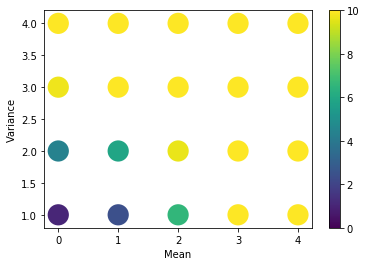

temp/c24
Area under surface (rectangular approx) =  278.9070263335199
Violations =  5.0
Average_violations =  3.4
MSE =  1.0790230566802994


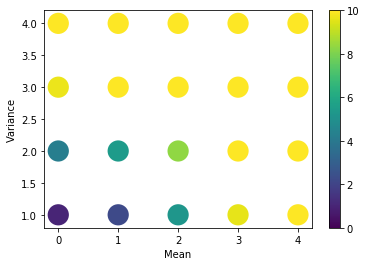

temp/c25
Area under surface (rectangular approx) =  308.7126345500124
Violations =  10.0
Average_violations =  2.8
MSE =  1.073624377571044


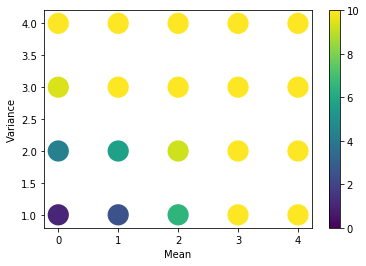

temp/c26
Area under surface (rectangular approx) =  287.04487146516544
Violations =  8.0
Average_violations =  4.4
MSE =  1.0724053565886582


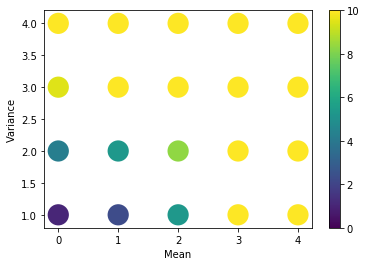

temp/c27
Area under surface (rectangular approx) =  238.48845885949308
Violations =  10.0
Average_violations =  3.7
MSE =  1.1308239426726971


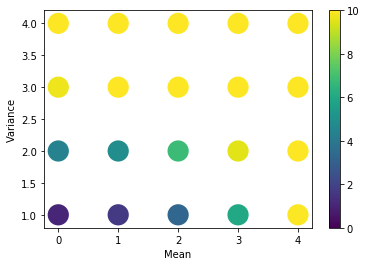

temp/c28
Area under surface (rectangular approx) =  617.2455240920258
Violations =  10.0
Average_violations =  5.5
MSE =  1.1223439444963803


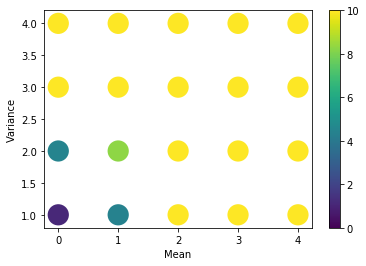

temp/c29
Area under surface (rectangular approx) =  411.16359108823764
Violations =  10.0
Average_violations =  4.6
MSE =  1.0885987990611163


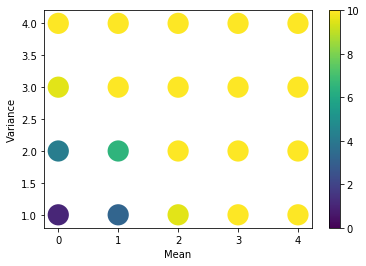

temp/c30
Area under surface (rectangular approx) =  786.3454152348957
Violations =  10.0
Average_violations =  5.0
MSE =  1.150197905683637


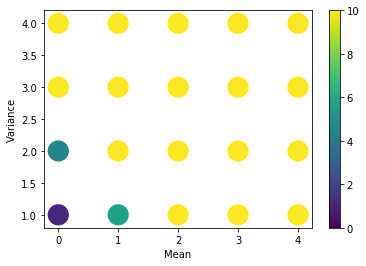

temp/c31
Area under surface (rectangular approx) =  340.41179187901133
Violations =  10.0
Average_violations =  3.5
MSE =  1.080687560901755


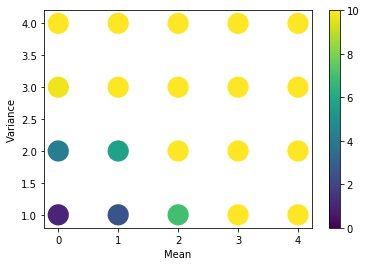

temp/c32
Area under surface (rectangular approx) =  317.5841101097523
Violations =  6.0
Average_violations =  4.1
MSE =  1.0778239126371174


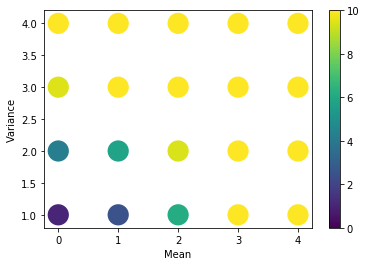

temp/c33
Area under surface (rectangular approx) =  366.1378759205345
Violations =  10.0
Average_violations =  3.3
MSE =  1.1006992111080003


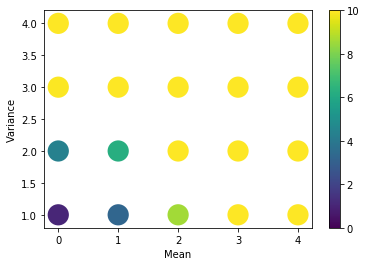

temp/c34
Area under surface (rectangular approx) =  386.34622262592484
Violations =  5.0
Average_violations =  3.4
MSE =  1.0760885050980002


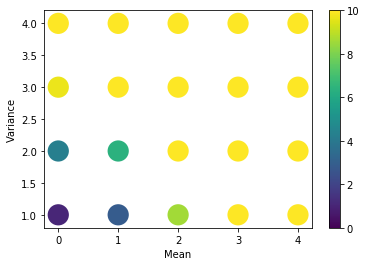

temp/c35
Area under surface (rectangular approx) =  334.3437817833836
Violations =  10.0
Average_violations =  4.3
MSE =  1.0993741627187092


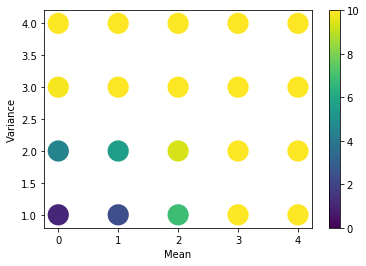

temp/c36
Area under surface (rectangular approx) =  518.883578427413
Violations =  10.0
Average_violations =  4.7
MSE =  1.1156859392301806


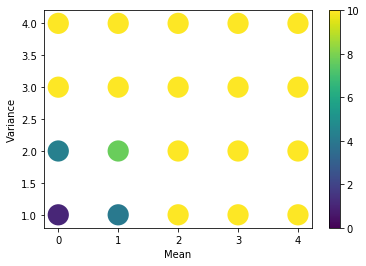

temp/c37
Area under surface (rectangular approx) =  329.0785039960972
Violations =  10.0
Average_violations =  3.4
MSE =  1.077095855292188


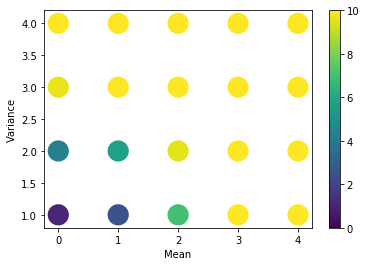

temp/c38
Area under surface (rectangular approx) =  290.3698983517305
Violations =  8.0
Average_violations =  3.9
MSE =  1.0652311458589083


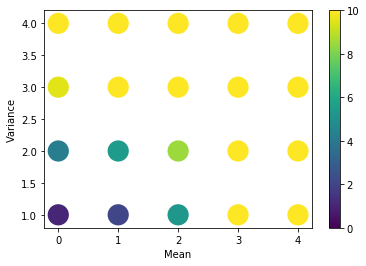

temp/c39
Area under surface (rectangular approx) =  354.95563873038753
Violations =  8.0
Average_violations =  4.2
MSE =  1.0712554437012067


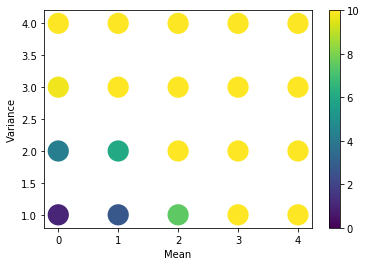

temp/c40
Area under surface (rectangular approx) =  240.37790714814102
Violations =  10.0
Average_violations =  4.5
MSE =  1.0799573200110746


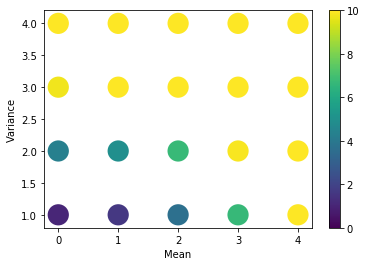

temp/c41
Area under surface (rectangular approx) =  472.4236361999007
Violations =  10.0
Average_violations =  3.1
MSE =  1.1037502866198052


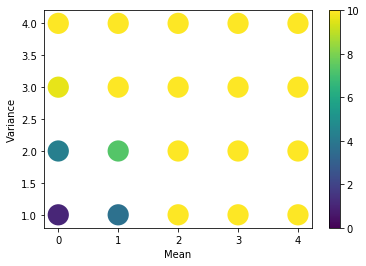

temp/c42
Area under surface (rectangular approx) =  225.61365856497832
Violations =  10.0
Average_violations =  3.4
MSE =  1.081644443984262


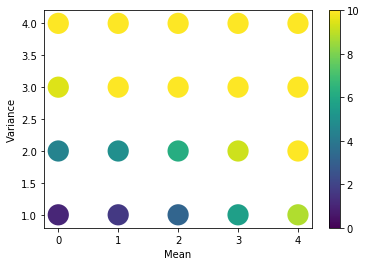

temp/c43
Area under surface (rectangular approx) =  285.4090604290497
Violations =  10.0
Average_violations =  4.4
MSE =  1.090975631312294


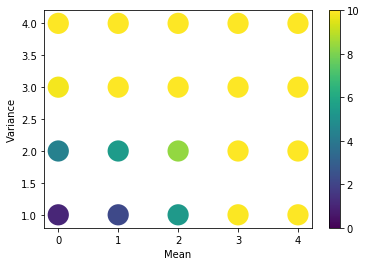

temp/c44
Area under surface (rectangular approx) =  451.3912329524867
Violations =  8.0
Average_violations =  3.7
MSE =  1.129096856134699


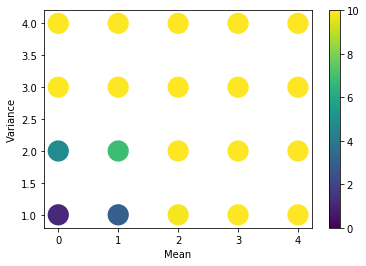

temp/c45
Area under surface (rectangular approx) =  234.67560331093898
Violations =  10.0
Average_violations =  3.2
MSE =  1.1268005830051648


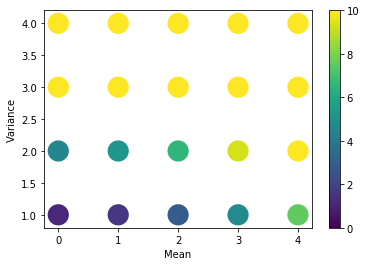

temp/c46
Area under surface (rectangular approx) =  304.9005288691811
Violations =  8.0
Average_violations =  4.8
MSE =  1.0711375550055549


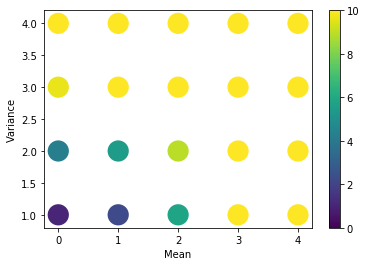

temp/c47
Area under surface (rectangular approx) =  281.7773620143998
Violations =  10.0
Average_violations =  3.4
MSE =  1.107794553951495


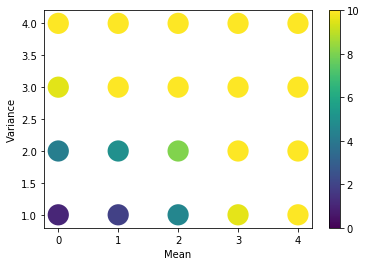

temp/c48
Area under surface (rectangular approx) =  343.48137959221344
Violations =  4.0
Average_violations =  2.8
MSE =  1.0767030173567123


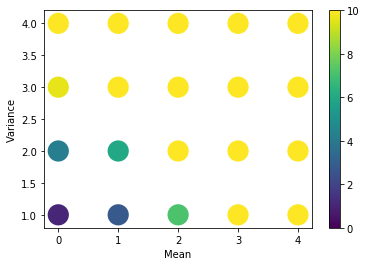

temp/c49
Area under surface (rectangular approx) =  255.8925577799187
Violations =  2.0
Average_violations =  1.4
MSE =  1.114538924100087


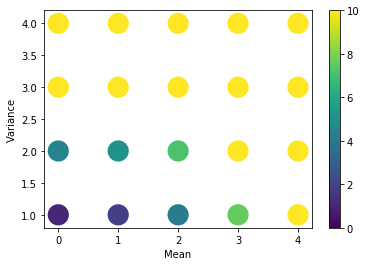

temp/c50
Area under surface (rectangular approx) =  327.5776799089547
Violations =  10.0
Average_violations =  3.9
MSE =  1.0875676915892256


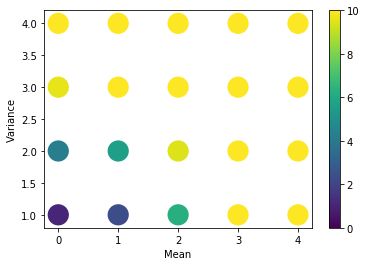

temp/c51
Area under surface (rectangular approx) =  240.27464048603133
Violations =  10.0
Average_violations =  4.7
MSE =  1.0947235918497484


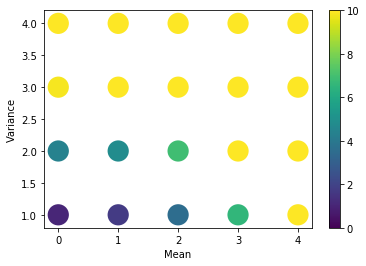

temp/c52
Area under surface (rectangular approx) =  521.4079028479126
Violations =  4.0
Average_violations =  2.6
MSE =  1.103153695284641


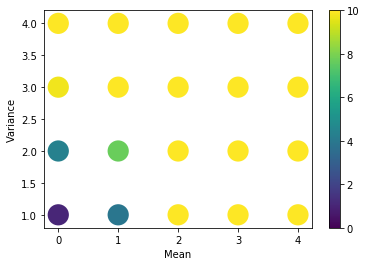

temp/c53
Area under surface (rectangular approx) =  562.0247433069376
Violations =  5.0
Average_violations =  2.1
MSE =  1.1469131405867938


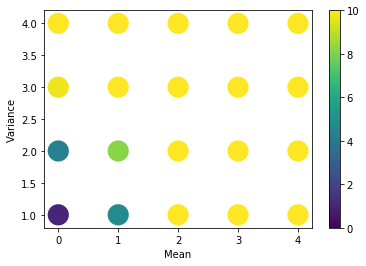

temp/c54
Area under surface (rectangular approx) =  312.50524608385
Violations =  0.0
Average_violations =  0.0
MSE =  1.0898931508607168


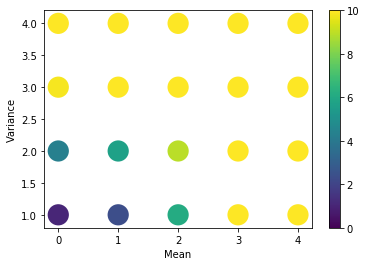

temp/c55
Area under surface (rectangular approx) =  293.5183807939508
Violations =  7.0
Average_violations =  3.7
MSE =  1.0679108370369055


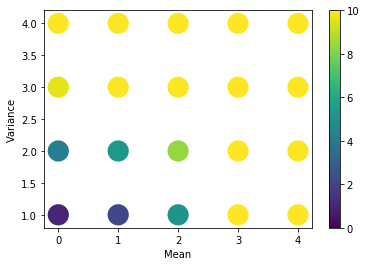

temp/c56
Area under surface (rectangular approx) =  611.003767966927
Violations =  10.0
Average_violations =  6.9
MSE =  1.1269783439870045


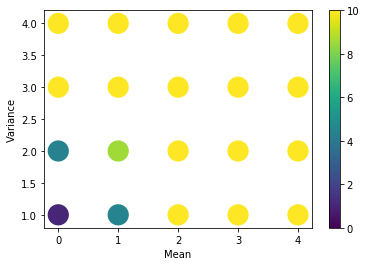

temp/c57
Area under surface (rectangular approx) =  484.9704096768926
Violations =  9.0
Average_violations =  3.0
MSE =  1.0856028666655337


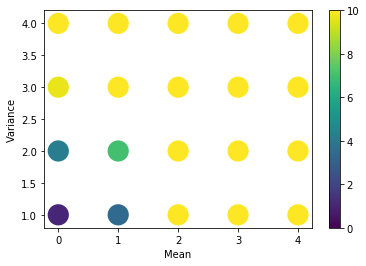

temp/c58
Area under surface (rectangular approx) =  229.84636776862277
Violations =  9.0
Average_violations =  2.4
MSE =  1.1457351825593591


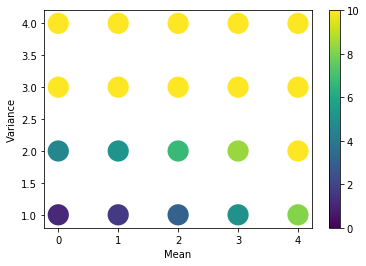

temp/c59
Area under surface (rectangular approx) =  438.3873801032454
Violations =  10.0
Average_violations =  5.1
MSE =  1.1279598311903936


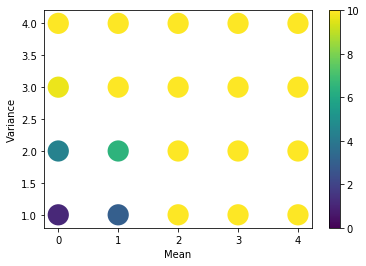

temp/c60
Area under surface (rectangular approx) =  358.4316603025832
Violations =  9.0
Average_violations =  2.4
MSE =  1.101767533363126


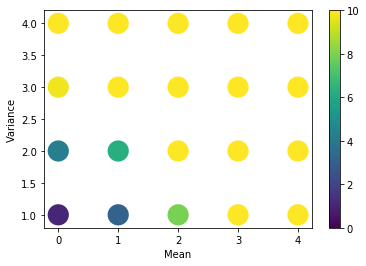

temp/c61
Area under surface (rectangular approx) =  364.9223412754622
Violations =  10.0
Average_violations =  3.5
MSE =  1.1490716434446584


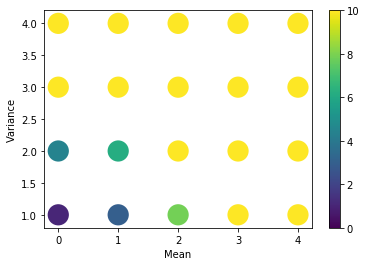

temp/c62
Area under surface (rectangular approx) =  291.0304515481351
Violations =  10.0
Average_violations =  4.5
MSE =  1.0807013815424749


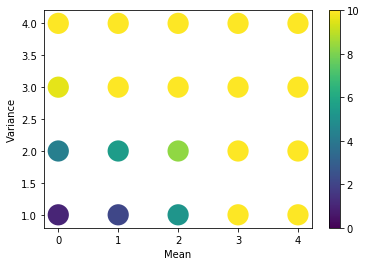

temp/c63
Area under surface (rectangular approx) =  277.43145852126173
Violations =  10.0
Average_violations =  3.2
MSE =  1.0884076915333838


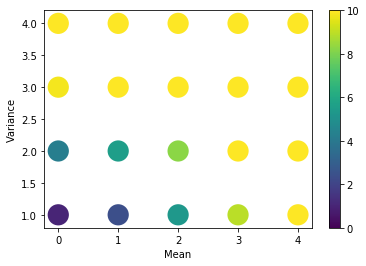

temp/c64
Area under surface (rectangular approx) =  305.42891829213056
Violations =  10.0
Average_violations =  4.6
MSE =  1.0693834964788311


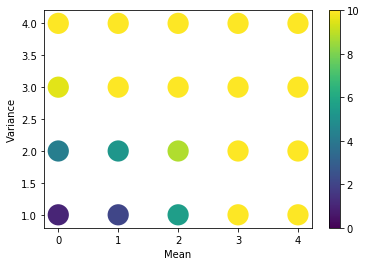

temp/c65
Area under surface (rectangular approx) =  280.09935305412057
Violations =  10.0
Average_violations =  4.0
MSE =  1.141835021985507


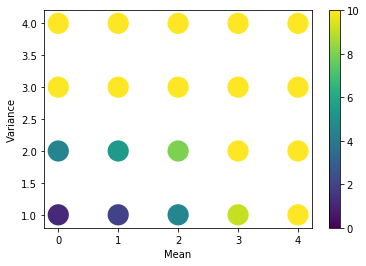

temp/c66
Area under surface (rectangular approx) =  293.6153680621633
Violations =  10.0
Average_violations =  4.3
MSE =  1.0684528701383917


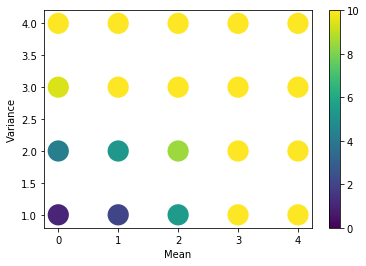

temp/c67
Area under surface (rectangular approx) =  266.92602154183027
Violations =  10.0
Average_violations =  4.8
MSE =  1.1122470448000832


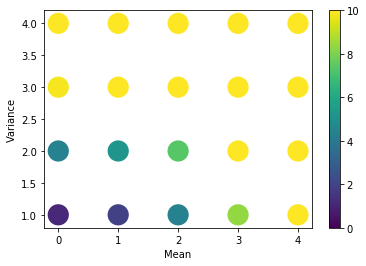

temp/c68
Area under surface (rectangular approx) =  318.7934913765229
Violations =  10.0
Average_violations =  4.9
MSE =  1.1177456328546875


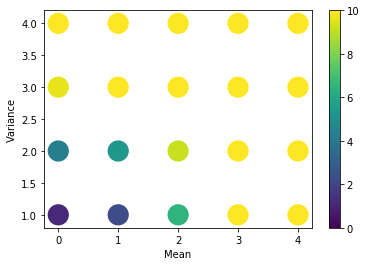

temp/c69
Area under surface (rectangular approx) =  270.2795469106366
Violations =  10.0
Average_violations =  3.7
MSE =  1.1020365333423356


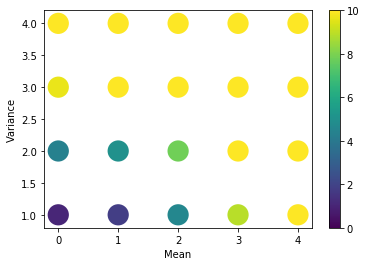

temp/c70
Area under surface (rectangular approx) =  321.3383227724632
Violations =  10.0
Average_violations =  4.0
MSE =  1.0773260722239493


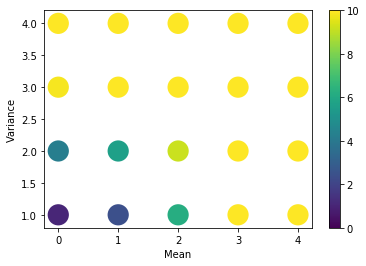

temp/c71
Area under surface (rectangular approx) =  237.26748934137393
Violations =  10.0
Average_violations =  3.9
MSE =  1.1027427616742116


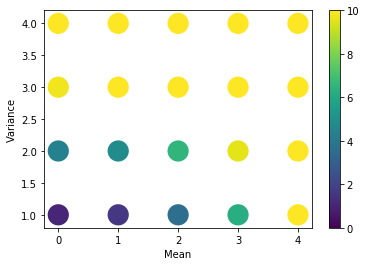

temp/c72
Area under surface (rectangular approx) =  250.36718846579805
Violations =  10.0
Average_violations =  3.7
MSE =  1.0898061537289396


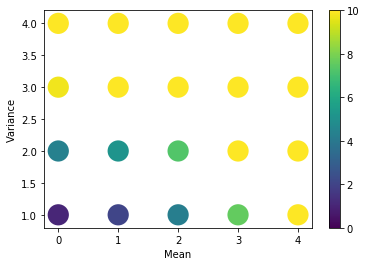

temp/c73
Area under surface (rectangular approx) =  269.36774364242444
Violations =  4.0
Average_violations =  2.6
MSE =  1.119772426566431


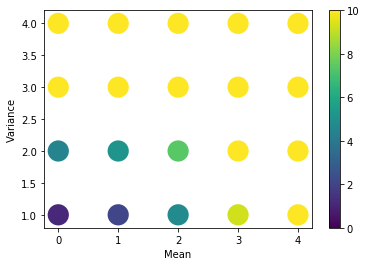

temp/c74
Area under surface (rectangular approx) =  264.68576914501386
Violations =  10.0
Average_violations =  5.0
MSE =  1.1181373745633978


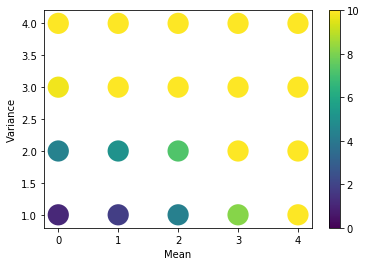

temp/c75
Area under surface (rectangular approx) =  289.96806845679083
Violations =  10.0
Average_violations =  4.7
MSE =  1.0917230858155986


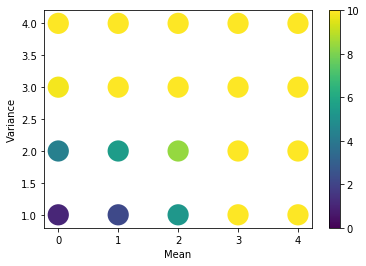

temp/c76
Area under surface (rectangular approx) =  414.6085494710361
Violations =  7.0
Average_violations =  3.2
MSE =  1.1413931086071947


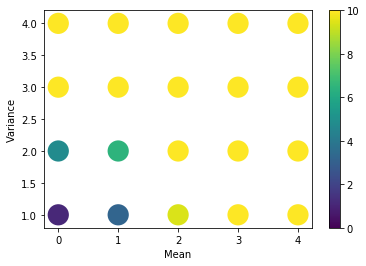

temp/c77
Area under surface (rectangular approx) =  326.71017239982814
Violations =  10.0
Average_violations =  4.4
MSE =  1.0791549461336607


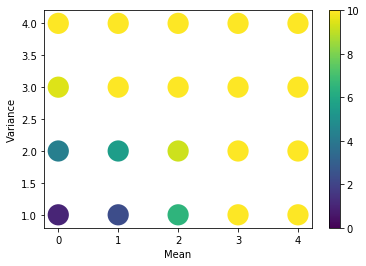

temp/c78
Area under surface (rectangular approx) =  346.69764384472353
Violations =  5.0
Average_violations =  1.5
MSE =  1.0805018952307517


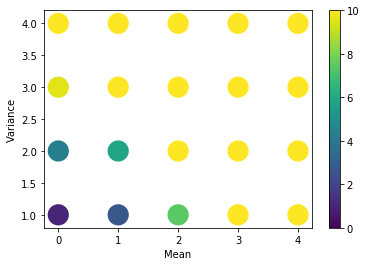

temp/c79
Area under surface (rectangular approx) =  357.97446796034257
Violations =  5.0
Average_violations =  3.5
MSE =  1.2213184034630111


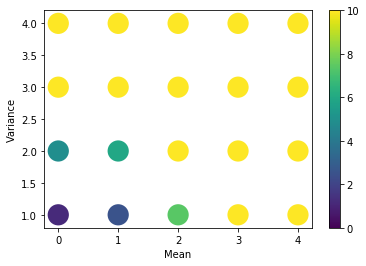

temp/c80
Area under surface (rectangular approx) =  403.4806059435583
Violations =  8.0
Average_violations =  3.9
MSE =  1.1041405641676776


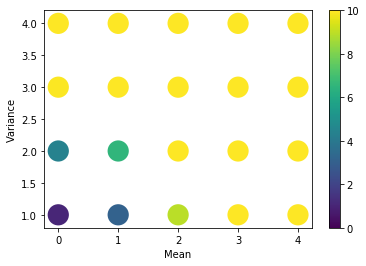

temp/c81
Area under surface (rectangular approx) =  502.41593565599004
Violations =  6.0
Average_violations =  3.1
MSE =  1.1388572638709138


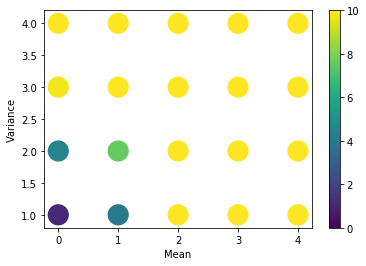

temp/c82
Area under surface (rectangular approx) =  331.8676209253678
Violations =  10.0
Average_violations =  4.0
MSE =  1.085987765150233


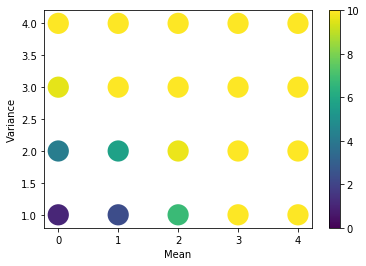

temp/c83
Area under surface (rectangular approx) =  431.3115766307658
Violations =  8.0
Average_violations =  3.1
MSE =  1.0866170124681225


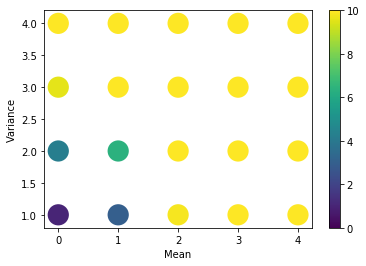

temp/c84
Area under surface (rectangular approx) =  322.1815872510702
Violations =  10.0
Average_violations =  3.9
MSE =  1.0852642142955855


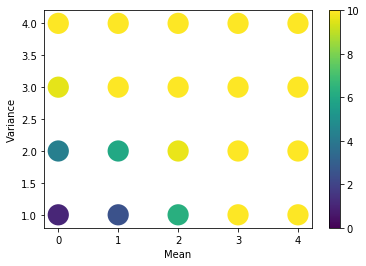

temp/c85
Area under surface (rectangular approx) =  328.5800463844734
Violations =  10.0
Average_violations =  3.3
MSE =  1.1219654530871777


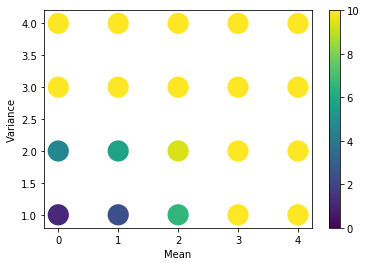

temp/c86
Area under surface (rectangular approx) =  248.5819078574348
Violations =  10.0
Average_violations =  3.2
MSE =  1.1067519073073344


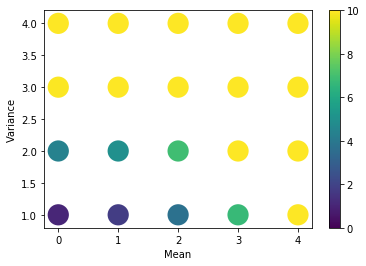

temp/c87
Area under surface (rectangular approx) =  322.6067348676371
Violations =  5.0
Average_violations =  2.8
MSE =  1.068968783309558


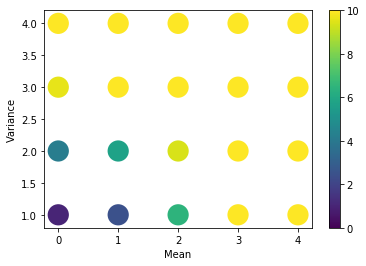

temp/c88
Area under surface (rectangular approx) =  295.04414935561374
Violations =  10.0
Average_violations =  5.0
MSE =  1.0819097329590626


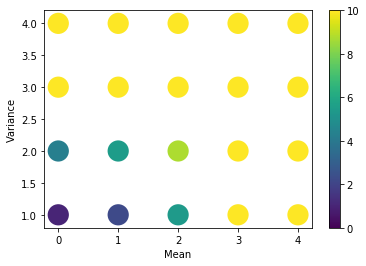

temp/c89
Area under surface (rectangular approx) =  286.37599455391313
Violations =  10.0
Average_violations =  3.8
MSE =  1.0817814136478763


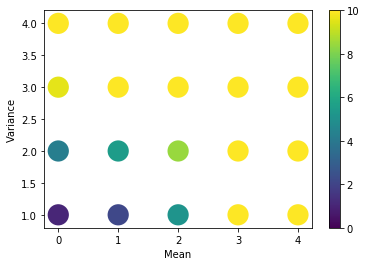

temp/c90
Area under surface (rectangular approx) =  381.40394452290434
Violations =  10.0
Average_violations =  3.8
MSE =  1.0740490751920748


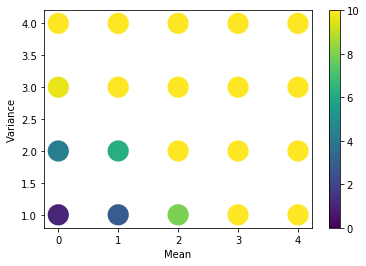

temp/c91
Area under surface (rectangular approx) =  324.0999757266401
Violations =  7.0
Average_violations =  2.1
MSE =  1.1220191431722024


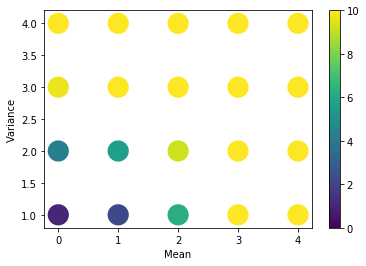

temp/c92
Area under surface (rectangular approx) =  403.348738075688
Violations =  10.0
Average_violations =  2.9
MSE =  1.0823983001243058


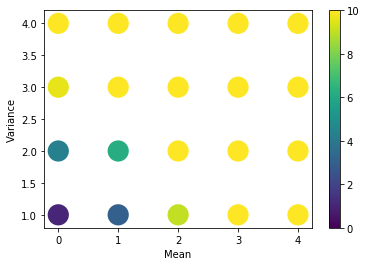

temp/c93
Area under surface (rectangular approx) =  261.05217283350635
Violations =  7.0
Average_violations =  2.4
MSE =  1.0958696794857536


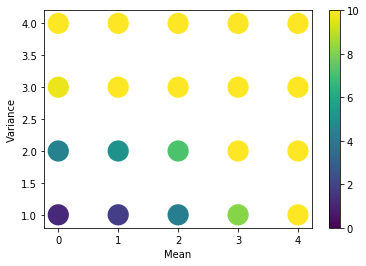

temp/c94
Area under surface (rectangular approx) =  274.3135970959786
Violations =  10.0
Average_violations =  4.6
MSE =  1.0931118021258628


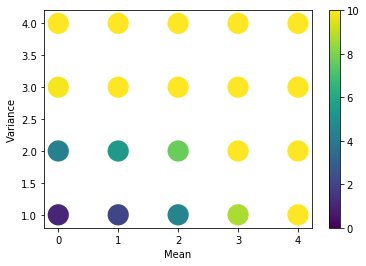

temp/c95
Area under surface (rectangular approx) =  258.5612029935373
Violations =  10.0
Average_violations =  3.0
MSE =  1.0797893797545044


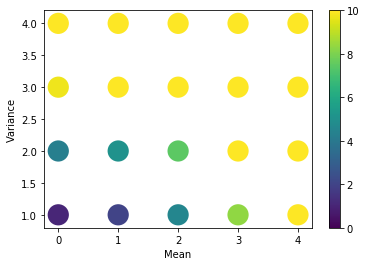

temp/c96
Area under surface (rectangular approx) =  291.29777398742095
Violations =  10.0
Average_violations =  3.9
MSE =  1.0726682210310439


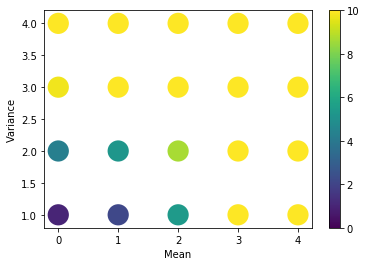

temp/c97
Area under surface (rectangular approx) =  303.7312542514344
Violations =  10.0
Average_violations =  3.4
MSE =  1.079460863666672


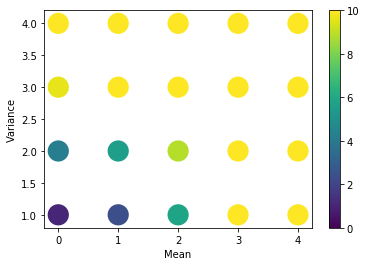

temp/c98
Area under surface (rectangular approx) =  324.83421594357486
Violations =  9.0
Average_violations =  5.1
MSE =  1.078792026130772


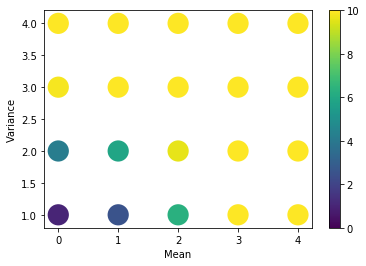

temp/c99
Area under surface (rectangular approx) =  426.51376220121716
Violations =  10.0
Average_violations =  4.0
MSE =  1.1083592827870343


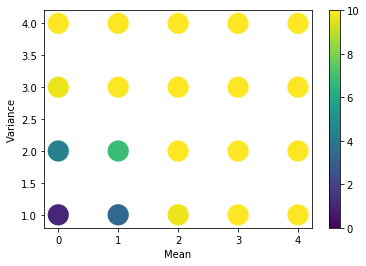

In [12]:
metric = []
metric_err = []
viol = []
viol_err = []

#normalize the violations for prettier graphing.
#also violations are always positive, so just divide by max.

#TMK
#violation_mean = violation_mean / np.max(violation_mean)

for i in range(len(violations)):
    print("Model_name = ", model_names[i], "Violations = ", violations[i])
    print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
    print("MSE = ", np.mean(mean[i]), np.std(mean[i]))
    #print("mean = ", mean[i])
    metric.append(np.mean(mean[i]))
    metric_err.append(np.std(mean[i]))
    viol.append(np.mean(violation_mean[i]))
    #viol.append(violations[i]/times)
    viol_err.append(np.std(violation_mean[i]))
print(np.array(metric), 
         np.array(metric_err), 
         np.array(viol), 
         np.array(viol_err))    

bar_plot(model_names, 
         np.array(metric), 
         np.array(metric_err), 
         np.array(viol), 
         np.array(viol_err))


def heat_plot(x,y,z, xlab = 'Mean', ylab = 'Variance', clim_low = 0, clim_high = 1):
    fig, ax = plt.subplots()

    cax = ax.scatter(x, y, c=z, s=450, edgecolor='')
    cax.set_clim(clim_low, clim_high)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    plt.colorbar(cax)
    plt.show()

    
MSE = []
VIO = []
VIO2 = []
AUS = []
for i, m in enumerate(models):
    print(model_names[i])
    x = []
    y = []
    z = []
    
    
    rectangular_approx = 0
    for k, v in metrics_dicts[i].items():
        x.append(float(k.split('_')[0]))
        y.append(float(k.split('_')[-1]))
        z.append(np.mean(v))
        rectangular_approx += np.mean(v)
    print("Area under surface (rectangular approx) = ", rectangular_approx)
    print("Violations = ", violations[i])
    print("Average_violations = ", np.mean(violation_mean[i]))
    print("MSE = ", np.mean(mean[i]))   
    MSE.append(np.mean(mean[i]))
    VIO.append(np.mean(violation_mean[i]))
    VIO2.append(np.mean(violation_mean2[i]))
    #VIO.append(violations[i]/times)
    AUS.append(rectangular_approx)
    
    heat_plot(x,y,z, clim_low = 0, clim_high = 10)
    
#heat_plot(MSE,VIO,AUS, xlab = 'MSE', ylab='Violations', clim_low = np.min(AUS), clim_high = np.max(AUS))
    



64.82718328472052 1.2007517863101733


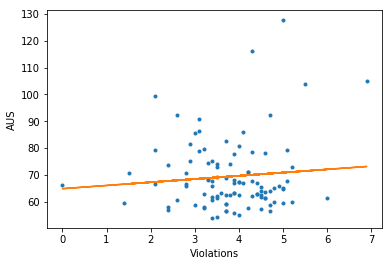

64.91057606276067 0.6886973196625947


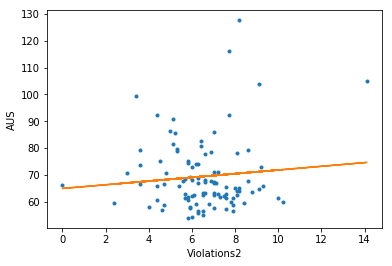

Low Violations =  71.73763582411735 for 10
High Violations =  65.55262152056581 for 41
Low Violations =  71.73763582411735 for 10
High Violations =  65.5526215205658 for 41
Low MSE =  1.08127031036337 for 10
High MSE =  1.0796606730075666 for 41
-89.24380931160603 144.28364687800124


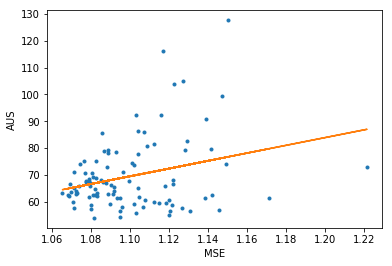

62.21611656516054 10.765933079477929


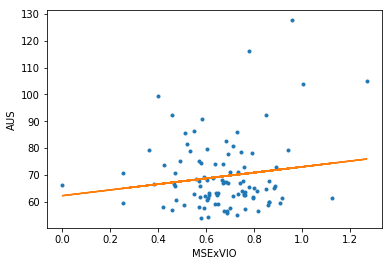

In [6]:
from numpy.polynomial.polynomial import polyfit  
fig, ax = plt.subplots()
b,m = polyfit(VIO,AUS, 1)
print(b,m)
ax.plot(VIO,AUS, '.')

plt.plot(VIO, b + m * np.array(VIO), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("Violations")
ax.set_ylabel("AUS")
plt.show()


fig, ax = plt.subplots()
b,m = polyfit(VIO2,AUS, 1)
print(b,m)
ax.plot(VIO2,AUS, '.')
plt.plot(VIO2, b + m * np.array(VIO2), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("Violations2")
ax.set_ylabel("AUS")
plt.show()


lowest_n = 50
sorted_mse = sorted(MSE)
threshold_mse = sorted_mse[lowest_n]

mse = []
aus = []
vio = []
vio2 = []
for i in range(len(AUS)):
    if MSE[i] <= threshold_mse:
        mse.append(MSE[i])
        aus.append(AUS[i])
        vio.append(VIO[i])
        vio2.append(VIO2[i])


sorted_aus = [aus for _,aus in sorted(zip(vio,aus))]
sorted_aus2 = [aus for _,aus in sorted(zip(vio2,aus))]
sorted_mse = [mse for _,mse in sorted(zip(vio2,mse))]

low = []
low_mse = []
high = []
high_mse = []

split = 10
low = sorted_aus[:split]
high = sorted_aus[split:]
low2 = sorted_aus2[:split]
high2 = sorted_aus2[split:]
low_mse = sorted_mse[:split]
high_mse = sorted_mse[split:]
        
        
print("Low Violations = ", np.mean(low), "for", len(low))
print("High Violations = ", np.mean(high), "for", len(high))
print("Low Violations = ", np.mean(low2), "for", len(low2))
print("High Violations = ", np.mean(high2), "for", len(high2))
print("Low MSE = ", np.mean(low_mse), "for", len(low_mse))
print("High MSE = ", np.mean(high_mse), "for", len(high_mse))



fig, ax = plt.subplots()
b,m = polyfit(MSE,AUS, 1)
print(b,m)
ax.plot(MSE,AUS, '.')
plt.plot(MSE, b + m * np.array(MSE), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("MSE")
ax.set_ylabel("AUS")
plt.show()


METRIC = (VIO/np.max(VIO))*MSE*MSE
fig, ax = plt.subplots()
b,m = polyfit(METRIC,AUS, 1)
print(b,m)
ax.plot(METRIC,AUS, '.')
plt.plot(METRIC, b + m * np.array(METRIC), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("MSExVIO")
ax.set_ylabel("AUS")
plt.show()


METRIC = (VIO/np.max(VIO))*MSE*MSE
x = []
y1 = []
y2 = []
y3 = []
for split in range(10, len(AUS), 10):
    print("******", split, "*******")
    sorted_aus = [AUS for _,AUS in sorted(zip(VIO,AUS))]
    sorted_mse = [MSE for _,MSE in sorted(zip(VIO,MSE))]

    low = []
    high = []
    low = sorted_aus[:split]
    high = sorted_aus[split:]

    x.append(split)
    
    print("Low Violations = ", np.mean(low), "for", len(low))
    print("High Violations = ", np.mean(high), "for", len(high))
    y1.append(np.mean(high))
    sorted_aus_by_mse = [AUS for _,AUS in sorted(zip(MSE,AUS))]
    low = sorted_aus_by_mse[:split]
    high = sorted_aus_by_mse[split:]
    print("Low AUS by MSE = ", np.mean(low), "for", len(low))
    print("High AUS by MSE = ", np.mean(high), "for", len(high))
    y2.append(np.mean(high))
    sorted_aus = [AUS for _,AUS in sorted(zip(METRIC,AUS))]
    sorted_mse = [MSE for _,MSE in sorted(zip(METRIC,MSE))]

    low = []
    high = []
    low = sorted_aus[:split]
    high = sorted_aus[split:]



    print("Low Metric = ", np.mean(low), "for", len(low))
    print("High Metric = ", np.mean(high), "for", len(high))
    y3.append(np.mean(high))
    

fig, ax = plt.subplots()

ax.plot(x,y1, '-', label = 'Violations')
ax.plot(x,y2, '-', label = 'MSE')
ax.plot(x,y3, '-', label = 'METRIC')
ax.legend()

ax.set_xlabel("MSE")
ax.set_ylabel("AUS")
plt.show()  

****** 10 *******
Low Violations =  69.05637474292122 for 10
High Violations =  69.42844816688151 for 90
Low AUS by MSE =  63.47020868987422 for 10
High AUS by MSE =  70.04913328388673 for 90
Low Metric =  72.22694579503423 for 10
High Metric =  69.07616249442451 for 90
****** 20 *******
Low Violations =  72.63500151705469 for 20
High Violations =  68.58030065134317 for 80
Low AUS by MSE =  65.88976563603947 for 20
High AUS by MSE =  70.26660962159698 for 80
Low Metric =  72.63500151705469 for 20
High Metric =  68.58030065134317 for 80
****** 30 *******
Low Violations =  70.91651114861284 for 30
High Violations =  68.73755354271663 for 70
Low AUS by MSE =  65.09545547553036 for 30
High AUS by MSE =  71.23229168832339 for 70
Low Metric =  71.05433172354128 for 30
High Metric =  68.678487582033 for 70
****** 40 *******
Low Violations =  69.80043851287314 for 40
High Violations =  69.11844236556036 for 60
Low AUS by MSE =  66.22563676724539 for 40
High AUS by MSE =  71.50164352931219 for 

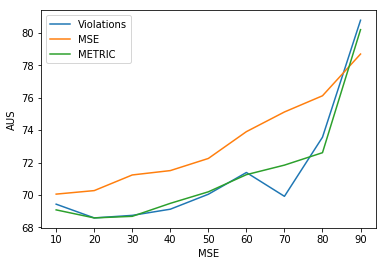

304.4158555953242 9.297755877321677


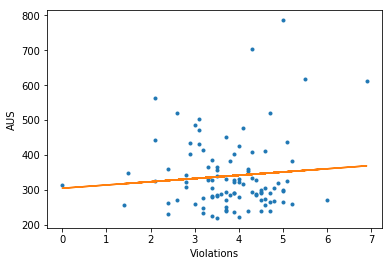

305.71880041434804 5.231759187008317


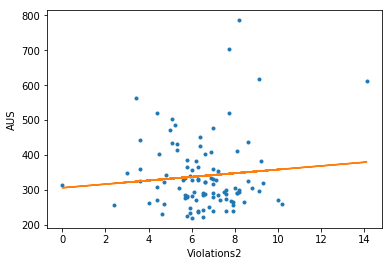

Low Violations =  365.3562425778712 for 10
High Violations =  309.34300212843976 for 41
Low Violations =  365.3562425778712 for 10
High Violations =  309.3430021284397 for 41
Low MSE =  1.08127031036337 for 10
High MSE =  1.0796606730075666 for 41
-794.9753086140703 1032.0749517155584


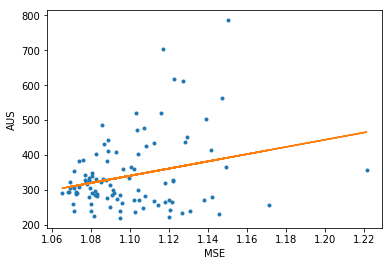

285.5107971331665 81.39328866272122


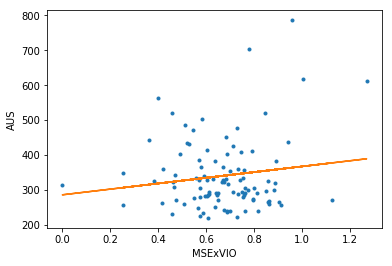

****** 10 *******
Low Violations =  336.12849707525993 for 10
High Violations =  340.15975108610877 for 90
Low AUS by MSE =  295.07850695805416 for 10
High AUS by MSE =  344.7208610991317 for 90
Low Metric =  361.33251299580877 for 10
High Metric =  337.3593048727145 for 90
****** 20 *******
Low Violations =  367.17609034872555 for 20
High Violations =  332.90175951909856 for 80
Low AUS by MSE =  312.4592818874406 for 20
High AUS by MSE =  346.5809616344198 for 80
Low Metric =  367.17609034872555 for 20
High Metric =  332.9017595190985 for 80
****** 30 *******
Low Violations =  351.818179700164 for 30
High Violations =  334.58738824996385 for 70
Low AUS by MSE =  306.50994229074536 for 30
High AUS by MSE =  354.0052042825719 for 70
Low Metric =  353.1945724237309 for 30
High Metric =  333.9975056541495 for 70
****** 40 *******
Low Violations =  342.60376190832096 for 40
High Violations =  337.85853486949253 for 60
Low AUS by MSE =  316.249634350682 for 40
High AUS by MSE =  355.4279532

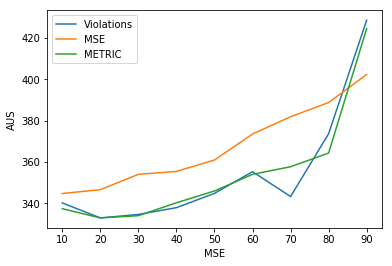

In [13]:
from numpy.polynomial.polynomial import polyfit  
fig, ax = plt.subplots()
b,m = polyfit(VIO,AUS, 1)
print(b,m)
ax.plot(VIO,AUS, '.')

plt.plot(VIO, b + m * np.array(VIO), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("Violations")
ax.set_ylabel("AUS")
plt.show()


fig, ax = plt.subplots()
b,m = polyfit(VIO2,AUS, 1)
print(b,m)
ax.plot(VIO2,AUS, '.')
plt.plot(VIO2, b + m * np.array(VIO2), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("Violations2")
ax.set_ylabel("AUS")
plt.show()


lowest_n = 50
sorted_mse = sorted(MSE)
threshold_mse = sorted_mse[lowest_n]

mse = []
aus = []
vio = []
vio2 = []
for i in range(len(AUS)):
    if MSE[i] <= threshold_mse:
        mse.append(MSE[i])
        aus.append(AUS[i])
        vio.append(VIO[i])
        vio2.append(VIO2[i])


sorted_aus = [aus for _,aus in sorted(zip(vio,aus))]
sorted_aus2 = [aus for _,aus in sorted(zip(vio2,aus))]
sorted_mse = [mse for _,mse in sorted(zip(vio2,mse))]

low = []
low_mse = []
high = []
high_mse = []

split = 10
low = sorted_aus[:split]
high = sorted_aus[split:]
low2 = sorted_aus2[:split]
high2 = sorted_aus2[split:]
low_mse = sorted_mse[:split]
high_mse = sorted_mse[split:]
        
        
print("Low Violations = ", np.mean(low), "for", len(low))
print("High Violations = ", np.mean(high), "for", len(high))
print("Low Violations = ", np.mean(low2), "for", len(low2))
print("High Violations = ", np.mean(high2), "for", len(high2))
print("Low MSE = ", np.mean(low_mse), "for", len(low_mse))
print("High MSE = ", np.mean(high_mse), "for", len(high_mse))



fig, ax = plt.subplots()
b,m = polyfit(MSE,AUS, 1)
print(b,m)
ax.plot(MSE,AUS, '.')
plt.plot(MSE, b + m * np.array(MSE), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("MSE")
ax.set_ylabel("AUS")
plt.show()


METRIC = (VIO/np.max(VIO))*MSE*MSE
fig, ax = plt.subplots()
b,m = polyfit(METRIC,AUS, 1)
print(b,m)
ax.plot(METRIC,AUS, '.')
plt.plot(METRIC, b + m * np.array(METRIC), '-')
    #cax = ax.scatter(VIO,AUS)
ax.set_xlabel("MSExVIO")
ax.set_ylabel("AUS")
plt.show()


METRIC = (VIO/np.max(VIO))*MSE*MSE
x = []
y1 = []
y2 = []
y3 = []
for split in range(10, len(AUS), 10):
    print("******", split, "*******")
    sorted_aus = [AUS for _,AUS in sorted(zip(VIO,AUS))]
    sorted_mse = [MSE for _,MSE in sorted(zip(VIO,MSE))]

    low = []
    high = []
    low = sorted_aus[:split]
    high = sorted_aus[split:]

    x.append(split)
    
    print("Low Violations = ", np.mean(low), "for", len(low))
    print("High Violations = ", np.mean(high), "for", len(high))
    y1.append(np.mean(high))
    sorted_aus_by_mse = [AUS for _,AUS in sorted(zip(MSE,AUS))]
    low = sorted_aus_by_mse[:split]
    high = sorted_aus_by_mse[split:]
    print("Low AUS by MSE = ", np.mean(low), "for", len(low))
    print("High AUS by MSE = ", np.mean(high), "for", len(high))
    y2.append(np.mean(high))
    sorted_aus = [AUS for _,AUS in sorted(zip(METRIC,AUS))]
    sorted_mse = [MSE for _,MSE in sorted(zip(METRIC,MSE))]

    low = []
    high = []
    low = sorted_aus[:split]
    high = sorted_aus[split:]



    print("Low Metric = ", np.mean(low), "for", len(low))
    print("High Metric = ", np.mean(high), "for", len(high))
    y3.append(np.mean(high))
    

fig, ax = plt.subplots()

ax.plot(x,y1, '-', label = 'Violations')
ax.plot(x,y2, '-', label = 'MSE')
ax.plot(x,y3, '-', label = 'METRIC')
ax.legend()

ax.set_xlabel("MSE")
ax.set_ylabel("AUS")
plt.show() 